# Broadcasting

> ## Learning Objectives
>
> After the lesson learner:
>
> * Can predict the result of additions of matrices and row or column vectors.
> * Can explain why broadcasting is better than using for loops.
> * Understands the rules of broadcasting and can predict the shape of broadcasted arrays.
> * Knows how to control broadcasting using `np.newaxis` object.

It’s possible to do operations on arrays of different sizes. In some case NumPy can
transform these arrays automatically so that they all have the same size: this conversion is
called **broadcasting**.

![numpy broadcasting in 2D](numpy_broadcasting.png "numpy broadcasting in 2D")

Let's try to reproduce the above diagram. First, we create two two-dimensional arrays:

In [48]:
import numpy as np
a = np.arange(4) * 10
a2 = np.tile(a, (3, 1)).T
a2

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

We do the same with the second array, but we need also to transpose (exchange columns with rows) the resulting array:

In [49]:
b2 = np.tile(b, (4, 1))
b2

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

Note that the `np.tile` function creates new arrays and copies the data. 

We can now add the arrays element-wise:

In [50]:
a2 + b2

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In the second example we add a one-dimensional array to a two-dimensional array. NumPy will automatically "tile" the 1D array along the missing direction:

In [51]:
b = np.arange(3)
a2 + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

However, in this case no copy of `b` array is involved. NumPy will instead use the same data in `b` for each row of `a` -- we will cover the mechanism behind it at the end of the lesson. b

In the third example we add a single column with a single vector. To obtain a column array from a 1D array we need to convert it to 2D array of four rows and one column. In NumPy we can add singular dimensions (dimensions of size 1) by a special object `np.newaxis`:

In [52]:
a_column = a[:, np.newaxis]
a_column.shape

(4, 1)

In [53]:
a_column

array([[ 0],
       [10],
       [20],
       [30]])

We can add a column vector and a 1D array:

In [54]:
a_column + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

This is the same as adding a column and  a row:

In [58]:
b_row = b[np.newaxis, :]
b_row

array([[0, 1, 2]])

In [59]:
b_row.shape

(1, 3)

In [60]:
a_column + b_row

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

> ## Exercise: Normalising data

> Given the following array:

> ```
> a = np.random.rand(10, 100) 
> ```

> For each column of `a` subtract its mean. Next, do the same with rows.


> ##  Exercise: Route 66
>
> Ginen the mileposts construct an array of distances (in miles) between cities of Route 66: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff and Los Angeles.
>
> ```
> mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
> ```
> ![Distances on Route 66](route66.png)

## Broadcasting rules

Broadcasting seems a bit magical, but it is actually quite natural to use it when we want to solve a problem whose output data is an array with more dimensions than input data. There a simple rule that allow to determine the validity of broadcasting and the shape of broadcasted arrays:

>  In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same or one of them must be one. 

This does indeed work for the three addition from the figure

```
a:      4 x 3 
b:      4 x 3
result: 4 x 3

a:      4 x 3
b:          3
result: 4 x 3

a:      4 x 1
b:          3
result: 4 x 3
```

Lets look at another example:

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

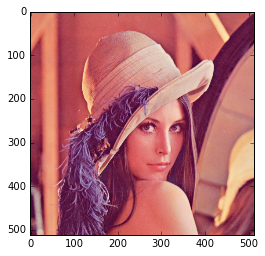

In [69]:
image = plt.imread('lena.jpg')
plt.imshow(image)

In [70]:
image.shape

(512, 512, 3)

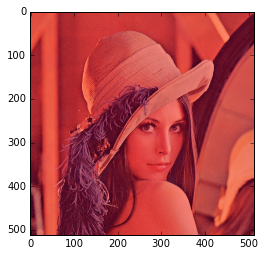

In [71]:
scale = np.array([1., 0.6, 0.6])
scaled = scale * image

plt.imshow(scaled.astype(np.uint8))

In [72]:
scaled.shape

(512, 512, 3)

```
image  (3d array): 512 x 512 x 3
scale  (1d array):             3
scaled (3d array): 512 x 512 x 3
```

## Quiz

What are the dimensions of `result` array?
```
A = np.random.rand(8, 1, 6, 1)
B = np.random.rand(7, 1, 5)
result = A + B
```



```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (?  array):              ?
```

> ## Quiz: Broadcasting rules
> 
> Given the arrays:
> ```
> X = np.random.rand(10,3)
> Y = np.random.rand(3)
> ```
> 
> which of the following will *not* produce an error. What will be the shapes of the final broadcasted arrays?
> 
> a) `X + Y`
> 
> b) `X[np.newaxis, :] + Y`
> 
> c) `X + Y[:, np.newaxis]`
> 
> d) `X[:, np.newaxis] + Y`
> 
> e) `X + Y[np.newaxis, :]`
>
> f) `X[:, np.newaxis, :] + Y`


> ## Exercise: Three-dimensional broadcasting
>
> Below, produce the array containing the sum of every element in `x` with every element in `y`
>
> ```python
> x = np.random.rand(3, 5)
> y = np.random.randint(10, size=8)
> z = x + y# FIX THIS
> ```

# Extra problems


> ## Broadcasting indices

> Predict and verify the shape of `y`:
> 
> ```python
> x = np.empty((10, 8, 6))
> 
> idx0 = np.zeros((3, 8)).astype(int)
> idx1 = np.zeros((3, 1)).astype(int)
> idx2 = np.zeros((1, 1)).astype(int)
> 
> y = x[idx0, idx1, idx2]
> ```

> ## Distances
> 
> Given an array of latitudes and longitudes of major European capitals calculate pairwise distances between them. Use the approximate formula: 
>
> $$D=6371.009\sqrt{(\Delta\phi)^2 + (\Delta\lambda)^2}\qquad \text{(in kilometers)},$$
>
> where $\Delta\phi=\phi_1-\phi_2$ and $\Delta\lambda=\lambda_1-\lambda_2$ are the differences between the latitudes and longitude of two cities in radians. (*Hint*: To convert degrees to radians multiply them by $\pi/180$).
> ```
> coords = np.array([
>                   [ 23.71666667,  37.96666667], # Athens
>                   [ 13.38333333,  52.51666667], # Berlin
>                   [ -0.1275    ,  51.50722222], # London
>                   [ -3.71666667,  40.38333333], # Madrid
>                   [  2.3508    ,  48.8567    ], # Paris
>                   [ 12.5       ,  41.9       ]  # Rome
                    ]) 
> ```
> When you are done you can compare the results with a more [precise formula](https://en.wikipedia.org/wiki/Geographical_distance#Spherical_Earth_projected_to_a_plane):
>
> $$D=6371.009\sqrt{(\Delta\phi)^2 + (\cos(\phi_m)\Delta\lambda)^2}$$
>
> where $\phi_m = (\phi_1+\phi_2) / 2$ is the mean latitude.

> ## Exercise: Creating a two-dimensional grid
> 
> What are the dimensionalities of `x`, `y` and `z` in the two cases:
>
> ```
> x, y = np.mgrid[:10, :5]
> z = x + y
> ```
> 
> and 
> 
> ```
> x, y = np.ogrid[:10, :5]
> z = x + y
> ```
> 
> What might be the advantage of using `np.ogrid` over `np.mgrid`?




## Further reading

* NumPy docs, http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html